# Zoo Project

## 1 Exploratory Data Analysis (EDA)

Import Packages

In [838]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from six import StringIO
import xgboost as xgb
import geopandas as gp
import umap.umap_ as umap
import pydot
import pydotplus
from IPython.display import Image  
from mpl_toolkits.axes_grid1 import make_axes_locatable

Load the Data

In [839]:
data_zoo1 = pd.read_csv("Datasets/zoo1.csv", sep=";")
data_zoo2 = pd.read_csv("Datasets/zoo2.csv")
data_zoo3 = pd.read_csv("Datasets/zoo3.csv")
data_index = pd.read_csv("Datasets/index.csv")
data_class = pd.read_csv("Datasets/class.csv")

Create General Function for data investigation

In [840]:
def data_check(df):
    list = []
    cols = df.columns
    print("the shape of the underlying dataset: " + str(df.shape))
    for c in cols:
        d_types = df[c].dtypes
        d_nunique = df[c].nunique()
        d_unique = df[c].unique()
        any_null = df[c].isnull().any()
        sum_null = df[c].isnull().sum()
        portion_null = round(sum_null/df.shape[0] * 100,2)
        list.append([c, d_types, d_nunique, d_unique, any_null, sum_null, portion_null])
    data_check = pd.DataFrame(list)
    data_check.columns = ["Feature", "Datatypes", "Number of unique values", "Unique values", "Any missing values?", "Number of missing values", "Portion missing values (in %)"]
    return data_check

### 1.1 Exploring the Datasets

<b> Data Zoo 1 </b>

In [841]:
data_zoo1.head(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4


In [842]:
data_check(data_zoo1)

the shape of the underlying dataset: (101, 18)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,animal_name,object,100,"[aardvark, antelope, bass, bear, boar, buffalo...",False,0,0.0
1,hair,bool,2,"[True, False]",False,0,0.0
2,feathers,bool,2,"[False, True]",False,0,0.0
3,eggs,bool,2,"[False, True]",False,0,0.0
4,milk,bool,2,"[True, False]",False,0,0.0
5,airborne,bool,2,"[False, True]",False,0,0.0
6,aquatic,bool,2,"[False, True]",False,0,0.0
7,predator,bool,2,"[True, False]",False,0,0.0
8,toothed,bool,2,"[True, False]",False,0,0.0
9,backbone,bool,2,"[True, False]",False,0,0.0


Observations:
- 101 entries
- 18 columns 
- Each entry describes the characteristics of a different animal
- Each column describes an attribute of an animal
- No Null values

<b> Data Zoo 2 </b>

In [843]:
data_zoo2.head(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3


In [844]:
data_check(data_zoo2)

the shape of the underlying dataset: (43, 18)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,animal_name,object,43,"[turtle, chameleon, iguana, lizard, gecko, pyt...",False,0,0.0
1,hair,int64,2,"[0, 1]",False,0,0.0
2,feathers,int64,1,[0],False,0,0.0
3,eggs,int64,1,[1],False,0,0.0
4,milk,int64,1,[0],False,0,0.0
5,airborne,int64,2,"[0, 1]",False,0,0.0
6,aquatic,int64,2,"[1, 0]",False,0,0.0
7,predator,int64,2,"[0, 1]",False,0,0.0
8,toothed,int64,2,"[0, 1]",False,0,0.0
9,backbone,int64,2,"[1, 0]",False,0,0.0


Observations
- 18 columns
- 43 entries 
- similar to Data Zoo 1
    - Each entry describes the characteristics of a different animal
    - Each column describes an attribute of an animal
- No null values 

<b> Data Zoo 3 </b>

In [845]:
data_zoo3.head(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1


In [846]:
data_check(data_zoo3)

the shape of the underlying dataset: (70, 18)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,animal_name,object,70,"[anta, ariranha, boto-cor-de-rosa, bugio, cach...",False,0,0.0
1,hair,int64,2,"[1, 0]",False,0,0.0
2,feathers,int64,2,"[0, 1]",False,0,0.0
3,eggs,int64,2,"[0, 1]",False,0,0.0
4,milk,int64,2,"[1, 0]",False,0,0.0
5,airborne,int64,2,"[0, 1]",False,0,0.0
6,aquatic,int64,2,"[0, 1]",False,0,0.0
7,predator,int64,2,"[0, 1]",False,0,0.0
8,toothed,int64,2,"[1, 0]",False,0,0.0
9,backbone,int64,2,"[1, 0]",False,0,0.0


Observations
- 70 entries
- 18 columns
- similar to Data Zoo 1 & 2
    - Each entry describes the characteristics of a different animal
    - Each column describes an attribute of an animal
- No null values

<b> Data Index </b>

In [847]:
data_index.head(3)

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,377.0,NaN,NaN
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,352.0,NaN,NaN
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,41.0,NaN,NaN


In [848]:
data_check(data_index)

the shape of the underlying dataset: (2137, 15)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,IUCN,object,12,"[TOT_KNOWN, TOT_KNOWN_IND, ENDANGERED, CRITICA...",False,0,0.00
1,IUCN Category,object,12,"[Total number of known species, Total number o...",False,0,0.00
2,SPEC,object,6,"[MAMMAL, BIRD, REPTILE, AMPHIBIAN, FISH_TOT, I...",False,0,0.00
3,Species,object,6,"[Mammals, Birds, Reptiles, Amphibians, Fish, I...",False,0,0.00
4,COU,object,39,"[AUS, AUT, BEL, CAN, CZE, DNK, FIN, FRA, DEU, ...",False,0,0.00
5,Country,object,39,"[Australia, Austria, Belgium, Canada, Czech Re...",False,0,0.00
6,Unit Code,object,2,"[NBR, PC]",False,0,0.00
7,Unit,object,2,"[Number, Percentage]",False,0,0.00
8,PowerCode Code,int64,1,[0],False,0,0.00
9,PowerCode,object,1,[Units],False,0,0.00


Observations
- 2137 entries
- 15 columns
- Each entry describes information of an IUCN (International Union of conservation of nature) category in a country 
- Null values in the following columns: Reference Period, Reference Period Code, Flag Codes, Flags
- We should drop these columns from the dataset as they only contain missing values and provide no information 

In [849]:
# Drop columns with missing values 
data_index.drop(["Reference Period Code", "Reference Period", "Flag Codes", "Flags"], axis=1, inplace=True)
data_check(data_index)

the shape of the underlying dataset: (2137, 11)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,IUCN,object,12,"[TOT_KNOWN, TOT_KNOWN_IND, ENDANGERED, CRITICA...",False,0,0.0
1,IUCN Category,object,12,"[Total number of known species, Total number o...",False,0,0.0
2,SPEC,object,6,"[MAMMAL, BIRD, REPTILE, AMPHIBIAN, FISH_TOT, I...",False,0,0.0
3,Species,object,6,"[Mammals, Birds, Reptiles, Amphibians, Fish, I...",False,0,0.0
4,COU,object,39,"[AUS, AUT, BEL, CAN, CZE, DNK, FIN, FRA, DEU, ...",False,0,0.0
5,Country,object,39,"[Australia, Austria, Belgium, Canada, Czech Re...",False,0,0.0
6,Unit Code,object,2,"[NBR, PC]",False,0,0.0
7,Unit,object,2,"[Number, Percentage]",False,0,0.0
8,PowerCode Code,int64,1,[0],False,0,0.0
9,PowerCode,object,1,[Units],False,0,0.0


<b> Data class </b>

In [850]:
data_class.head(3)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"


In [851]:
data_check(data_class)

the shape of the underlying dataset: (7, 4)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,Class_Number,int64,7,"[1, 2, 3, 4, 5, 6, 7]",False,0,0.0
1,Number_Of_Animal_Species_In_Class,int64,7,"[41, 20, 5, 13, 4, 8, 10]",False,0,0.0
2,Class_Type,object,7,"[Mammal, Bird, Reptile, Fish, Amphibian, Bug, ...",False,0,0.0
3,Animal_Names,object,7,"[aardvark, antelope, bear, boar, buffalo, calf...",False,0,0.0


Observation
- 7 entries
- 4 rows
- No null values
- each entry describes information on a certain animal class


### 1.2 Data Visualization

<b> Which Countries have the highest Number of known Fish Species? </b>

Text(0.5, 1.0, 'Top 10 Countries with highest Number of known Fish Species')

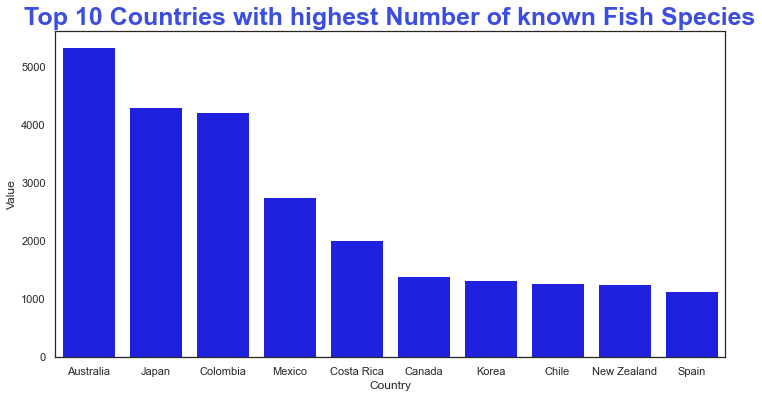

In [852]:
# Dataframe only with TOT_Known fish entries
data_fish = data_index[(data_index["Species"] == "Fish") &(data_index["IUCN"] == "TOT_KNOWN")]
# Dataframe with top ten countries with the highest number of known fish species 
data_known_fish_top10 = data_fish.sort_values(by="Value", ascending=False).head(10)
# Barplot
fig = plt.figure(figsize =(12, 6))
sns.barplot(x="Country", y="Value", data=data_known_fish_top10, color="Blue")
plt.title("Top 10 Countries with highest Number of known Fish Species", fontsize=25, fontweight="bold", c='#3C4EE0')

<b> What is the most vulnerable species in Germany? </b>

Text(0.5, 1.0, 'Most Vulnerable species in Germany')

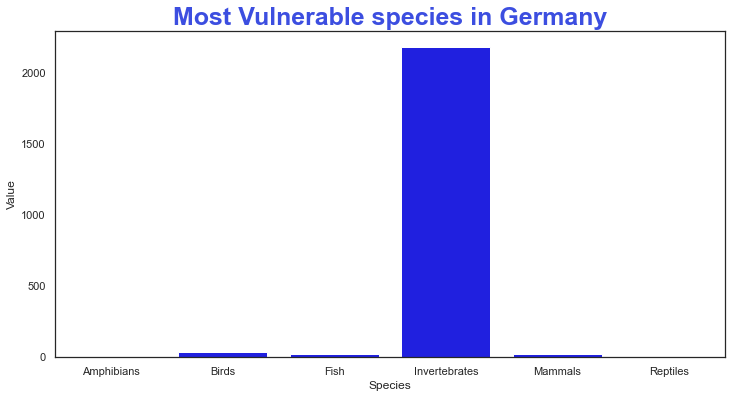

In [853]:
# Dataframe with entries of vulnerable animals from Germany 
data_Germany_vulnerable = data_index[(data_index["Country"]=="Germany") & (data_index["IUCN"]=="VULNERABLE")].sort_values(by="Species", ascending=True)
# Barplot 
fig = plt.figure(figsize =(12, 6))
sns.barplot(x="Species", y="Value", data=data_Germany_vulnerable, color="blue")
plt.title("Most Vulnerable species in Germany", fontsize=25, fontweight="bold", c='#3C4EE0')

<b> What is the most vulnerable species in Germany (without Invertebrates)? </b>

Text(0.5, 1.0, 'Most Vulnerable species in Germany (without Invertebrates)')

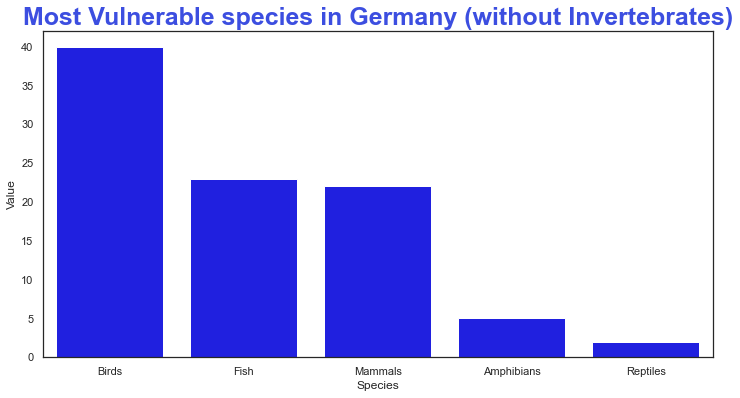

In [854]:
# Dataframe with entries of vulnerable animals from Germany without Invertebrates
data_Germany_vulnerable_wo_Invertebrates = data_Germany_vulnerable[data_Germany_vulnerable["Species"]!= "Invertebrates"].sort_values(by="Value", ascending=False)
# Barplot 
# Barplot 
fig = plt.figure(figsize =(12, 6))
sns.barplot(x="Species", y="Value", data=data_Germany_vulnerable_wo_Invertebrates, color="blue")
plt.title("Most Vulnerable species in Germany (without Invertebrates)", fontsize=25, fontweight="bold", c='#3C4EE0')

### 1.3 Merging Data
In the following I am going to merge the datasets "zoo1", "zoo2", "zoo3" and "class" into one data frame to get all the different data from different datasets into one data frame and then merge zoo and class datasets to facilitate  my further analysis.

<b> Merge: Zoo1; Zoo2; Zoo3 </b>

In [855]:
# Convert columns with Boolean values in Zoo1 to Integer (1 and 0)
# List of columns with boolean values 
bool_cols_names = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'tail', 'domestic', 'catsize']
for c in bool_cols_names:
    data_zoo1[c] = data_zoo1[c].astype(int)
data_zoo1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [856]:
# Concat Data Zoo1, Data Zoo2 and Data Zoo3 into Data Zoo
data_zoo = pd.concat([data_zoo1, data_zoo2, data_zoo3])

In [857]:
# Data check
data_check(data_zoo)

the shape of the underlying dataset: (214, 18)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,animal_name,object,213,"[aardvark, antelope, bass, bear, boar, buffalo...",False,0,0.0
1,hair,int64,2,"[1, 0]",False,0,0.0
2,feathers,int64,2,"[0, 1]",False,0,0.0
3,eggs,int64,2,"[0, 1]",False,0,0.0
4,milk,int64,2,"[1, 0]",False,0,0.0
5,airborne,int64,2,"[0, 1]",False,0,0.0
6,aquatic,int64,2,"[0, 1]",False,0,0.0
7,predator,int64,2,"[1, 0]",False,0,0.0
8,toothed,int64,2,"[1, 0]",False,0,0.0
9,backbone,int64,2,"[1, 0]",False,0,0.0


<b> Merge: data_zoo and class </b>

In [858]:
# Merging Zoo and class datasets  
# prepare merge by unifying the column name to"class_type" in both datasets
data_class.rename(columns={"Class_Number": "class_type"}, inplace=True)
data_zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [859]:
data_merged_final = pd.merge(data_zoo, data_class, how="inner", on="class_type")

In [860]:
data_merged_final.head(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,venomous,fins,legs,tail,domestic,catsize,class_type,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,4,0,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,0,4,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bear,1,0,0,1,0,0,1,1,1,...,0,0,4,0,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [861]:
data_check(data_merged_final)

the shape of the underlying dataset: (214, 21)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,animal_name,object,213,"[aardvark, antelope, bear, boar, buffalo, calf...",False,0,0.0
1,hair,int64,2,"[1, 0]",False,0,0.0
2,feathers,int64,2,"[0, 1]",False,0,0.0
3,eggs,int64,2,"[0, 1]",False,0,0.0
4,milk,int64,2,"[1, 0]",False,0,0.0
5,airborne,int64,2,"[0, 1]",False,0,0.0
6,aquatic,int64,2,"[0, 1]",False,0,0.0
7,predator,int64,2,"[1, 0]",False,0,0.0
8,toothed,int64,2,"[1, 0]",False,0,0.0
9,backbone,int64,2,"[1, 0]",False,0,0.0


### 1.4 Geocard: Critically endangered Mammals around the World

In the following I am going to use geopandas to create a map about endangered mammals around the world.

In [862]:
# Prepare dataset that only consists of endangered Mammals by country
data_critical_mammal = data_index[(data_index["SPEC"] == "MAMMAL") & (data_index["IUCN"] == "CRITICAL")]

In [863]:
data_critical_mammal.head(3)

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,Value
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,9.0
9,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUT,Austria,NBR,Number,0,Units,4.0
18,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,BEL,Belgium,NBR,Number,0,Units,4.0


Further preperation of dataset for plotting

In [864]:
# Data set with countries iso_a3 and their geometric data
zoo_path = gp.datasets.get_path('naturalearth_lowres')
df_geometric = gp.read_file(zoo_path)

# geometrical data
gs = gp.GeoSeries(df_geometric['geometry'])

# Add ISO_A3 column to Critical mammal dataset 
data_critical_mammal['iso_a3'] = data_critical_mammal['COU']
data_critical_mammal.drop(['COU'], axis=1, inplace=True)

# Merge dataset with critical mammals and dataset with geometric data
zoo_gp = pd.merge(data_critical_mammal, df_geometric, how = "outer", on = 'iso_a3')

# replace NaN values with 0
newzgp = zoo_gp.fillna(value=0, axis='columns')

# create the final dataset for plotting
gdf = gp.GeoDataFrame(newzgp, geometry=gs, crs="EPSG:4326")

<ipython-input-864-fdd8c16ceedf>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  zoo_path = gp.datasets.get_path('naturalearth_lowres')
<ipython-input-864-fdd8c16ceedf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_critical_mammal['iso_a3'] = data_critical_mammal['COU']
/Users/iba/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

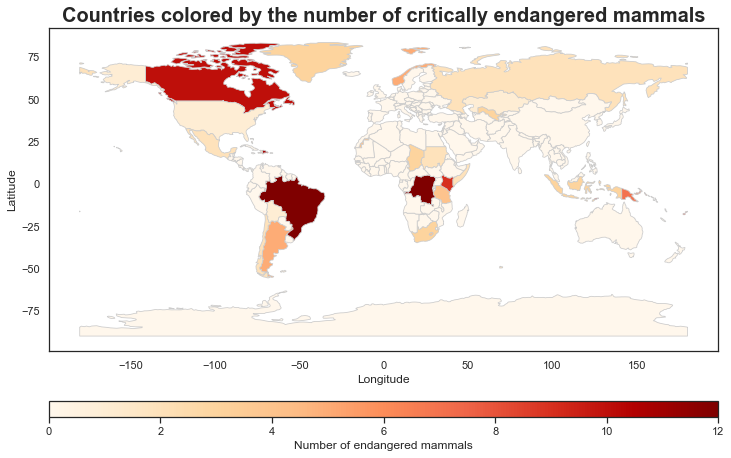

In [865]:
# Plotting the worldmap
fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.7)

gdf.plot(column="Value", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True,cax = cax,
                            legend_kwds={"label": "Number of endangered mammals", "orientation": "horizontal"})

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title('Countries colored by the number of critically endangered mammals', fontsize = 20, fontweight = "bold")

# plt.savefig("images/endangered_mammals", dpi=200)

plt.show()

## 2 Classification Analysis

### 2.1 Naive Classification Tree

#### 2.1.2 Data Preperation for Classification Tree

In [866]:
# Description of the columns/features in the dataset
features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

# Description of the target value
target = 'class_type'

# Splitting the data into independent and dependent variable
x = data_merged_final[features]
y = data_merged_final[target]

# Split into test and training split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Verification of the data
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (171, 16)
Shape of x_test: (43, 16)
Shape of y_train: (171,)
Shape of y_test: (43,)


#### 2.1.3 Training the Decision Tree

In [867]:
# Create an instance of DecisionTreeClassifier
classifier = DecisionTreeClassifier()
# Train the classifier with the training data
classifier.fit(x_train, y_train)
# Make predictions
predictions = classifier.predict(x_test)
# Define the class names based on the problem
class_names = data_class['Class_Type']

#### 2.1.4 Visualization of the Decision Tree: Display on which rules the model decides the matched class

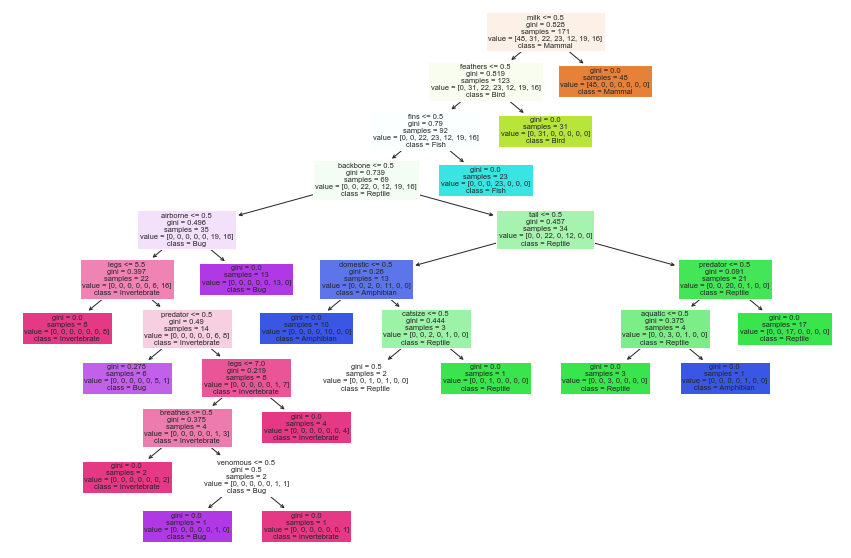

In [868]:
# Visualizierung des Entscheidungsbaums
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=x.columns, class_names=class_names, filled=True)
plt.show()

#### 2.1.5 Performance Evaluation 

Accuracy: 0.9534883720930233


<Figure size 720x576 with 0 Axes>

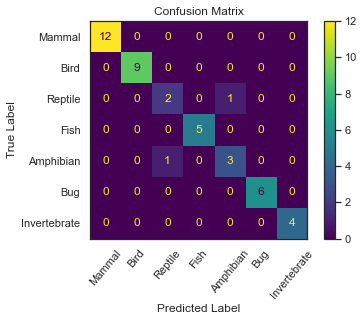

In [869]:
#######################
######## Evaluation
#######################

# Compute accurary 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print out the Confusion Matrix for our classification tree
# Generate Confusion Matrix
cm = confusion_matrix(y_test, predictions)

# Create ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.xticks(rotation= 50)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<b> Observations </b>

Results:

- Overall, the model achieves a high hit rate with an accuracy of about 95% and thus makes good predictions.
- However, the model has difficulty in distinguishing between reptiles and amphibians: The model has misclassified 1 reptile as an amphibian and it has misclassified 1 amphibian as a reptile.
- The most important features for predicting animal classes in this model are milk, backbone, feathers, and fins.

To understand why the model has difficulty correctly classifying certain labels, several factors may be at play:

- Similar characteristics: It is possible that reptiles and amphibians share similar characteristics that make it difficult to distinguish between them based on the given data. These similarities can lead to confusion.
- Lack of distinguishing characteristics: It is possible that the available features in the data are insufficient to allow a clear distinction between reptiles and amphibians. In such cases, the model may have difficulty making accurate predictions.
- Training data: If the model has not been sufficiently trained with data that cover the reptile-amphibian distinction well, this can lead to confounding. Insufficient variation or number of training data for these classes may result in lower accuracy in classification.

Rules

1. all animals that give milk are mammals.
2. animals that do not give milk, have a backbone, and can fly are birds.

...

### 2.2 KNN

In [870]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Create Accuracy list for different k-values
accuracy = []
repetition_range = 25

for i in range(1, repetition_range):
    # Create an instance of the KNN classifier for the current k
    knn_classifier = KNeighborsClassifier(n_neighbors=i, weights='distance')
    
    # Fit the KNN classifier to the training data
    knn_classifier.fit(x_train, y_train)
    
    # Predict the labels for the test data
    y_pred = knn_classifier.predict(x_test)
    
    # Evaluate the accuracy of the KNN classifier for the current k
    accuracy_i = accuracy_score(y_test, y_pred)
    accuracy.append(accuracy_i)

# k-Wert mit höchster Accuracy
max_k = accuracy.index(max(accuracy)) + 1
print("Best k: {}".format(max_k))
print("Highest Accuracy: {:.2f}".format(max(accuracy)))


Best k: 7
Highest Accuracy: 0.93


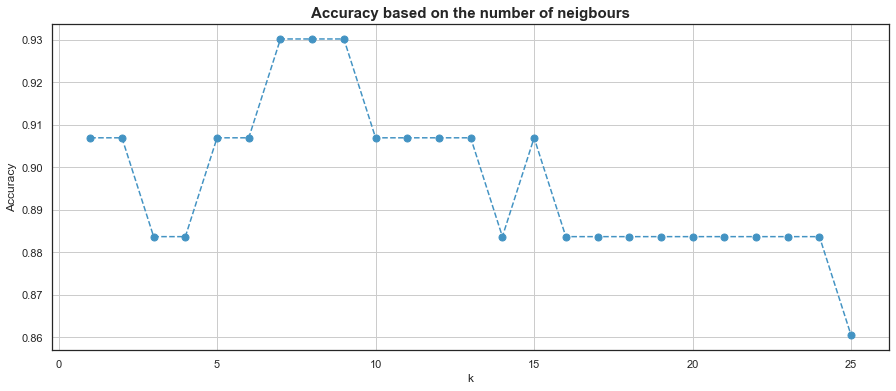

In [871]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Define a range of k values to try
k_values = range(1, 26)
# Accuracy nimmt ab je größer k

# Initialize a list to store the accuracies
accuracy_list = []

# Iterate over the k values
for k in k_values:
    # Create an instance of the KNN classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')

    # Fit the KNN classifier to the training data
    knn_classifier.fit(x_train, y_train)

    # Predict the labels for the test data
    y_pred = knn_classifier.predict(x_test)

    # Calculate the accuracy of the KNN classifier
    accuracy = np.mean(y_pred == y_test)

    # Store the accuracy in the list
    accuracy_list.append(accuracy)

# Plot the accuracy as a function of k
plt.figure(figsize=(15,6))
plt.plot(k_values, accuracy_list, color='#4393c3', linestyle='dashed', marker='o', markerfacecolor='#4393c3', markersize=7)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy based on the number of neigbours', fontsize=15, fontweight="bold")
plt.grid(True)
plt.show()



<b> Observations </b>

- The optimal k-value is 7 and leads to the highest possible accuracy of 93%.
- After that, the prediction accuracies are decreasing with the increase of the k-value. This is because there is a risk that the classification is too general. Especially when distinguishing between so many different classes, a too general classification can lead to errors.